### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [31]:
data = pd.read_csv('data/coupons.csv')

In [32]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [33]:
# Display basic information about the dataset
data_info = data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

Handling missing data would need evaluating extent of missing value and based on that we'll make decision. 
1.) Car has 108 non-null value so it better to drop this column
2.) Bar, CoffeeHouse,CarryAway, RestaurantLessThan20, Restaurant20To50 have some missing values. We will try to fill in missing values 

In [34]:
# Drop the 'car' column
data.drop(columns=['car'], inplace=True)


# Impute missing values in categorical columns with the mode
categorical_columns = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

for column in categorical_columns:
    mode_value = data[column].mode()[0]
    data[column].fillna(mode_value, inplace=True)

data_info = data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12684 non-null  object
 15  CoffeeHouse           12684 non-null

4. What proportion of the total observations chose to accept the coupon? 



In [35]:
# Calculate the mean of the 'Y' column in the DataFrame 'data'. 
# This gives the proportion of instances where the coupon was accepted, 
accept_coupon_proportion = data['Y'].mean()

# Convert the proportion to a percentage by multiplying by 100.
accept_coupon_proportion_percentage = accept_coupon_proportion * 100

# Format the proportion as a percentage string and print it
print(f"The percentage of instances where the coupon was accepted is {accept_coupon_proportion_percentage:.2f}%")

The percentage of instances where the coupon was accepted is 56.84%


5. Use a bar plot to visualize the `coupon` column.

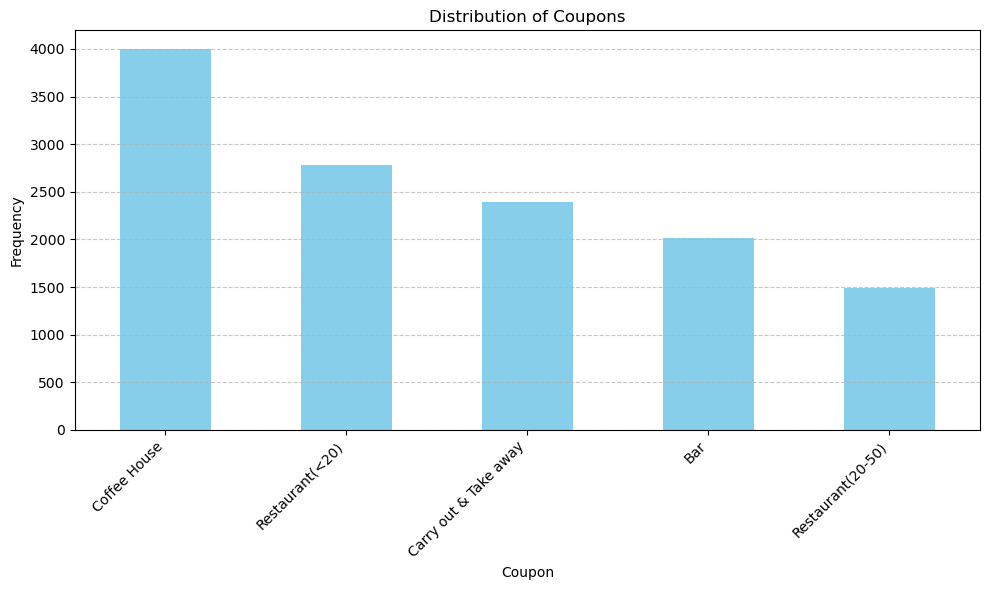

In [36]:
# Create a new figure with specified size
plt.figure(figsize=(10, 6))

# Plot a bar graph of the 'coupon' column's value counts
# This will show the frequency of each unique value in the 'coupon' column
data['coupon'].value_counts().plot(kind='bar', color='skyblue')

# Set the title of the plot
plt.title('Distribution of Coupons')

# Set the x and y axis labels
plt.xlabel('Coupon')
plt.ylabel('Frequency')

# Rotate the x-axis labels for better readability and align them right
plt.xticks(rotation=45, ha='right')

# Add a grid to the y-axis with specified style and transparency
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust the layout for better fit
plt.tight_layout()

# Display the plot
plt.show()

6. Use a histogram to visualize the temperature column.

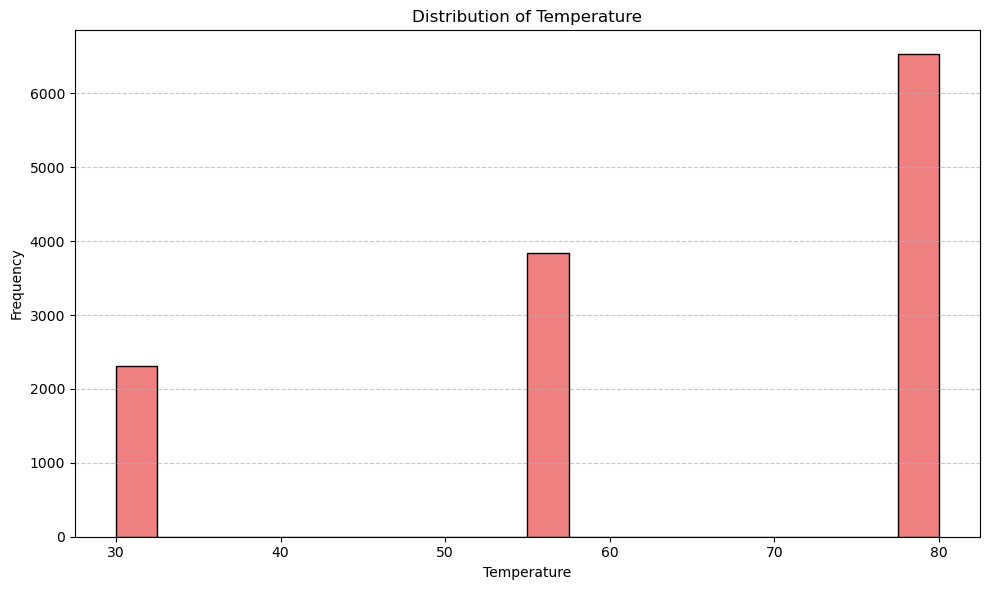

In [37]:
# Create a new figure with specified size
plt.figure(figsize=(10, 6))

# Plot a histogram of the 'temperature' column with 20 bins
# This will show the frequency of temperature ranges in the 'temperature' column
plt.hist(data['temperature'], bins=20, color='lightcoral', edgecolor='black')

# Set the title of the plot
plt.title('Distribution of Temperature')

# Set the x and y axis labels
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# Add a grid to the y-axis with specified style and transparency
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust the layout for better fit
plt.tight_layout()

# Display the plot
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [38]:
# Filter the DataFrame 'data' to include only rows where the 'coupon' column is equal to 'Bar'.
# This creates a new DataFrame 'bar_coupons_df' which contains only the rows related to 'Bar' coupons.
bar_coupons_df = data[data['coupon'] == 'Bar']

# Display the first few rows of the new DataFrame 'bar_coupons_df'.
# This is useful to quickly inspect the data and ensure the filtering was done correctly.
bar_coupons_df.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [39]:
# Calculate the mean of the 'Y' column in the DataFrame 'bar_coupons_df'. 
# This gives the proportion of instances where the 'Bar' coupon was accepted, 
# since 'Y' is presumably a binary variable where 1 indicates acceptance of the coupon and 0 indicates non-acceptance.
accepted_bar_coupons_proportion = bar_coupons_df['Y'].mean()

# Convert the proportion to a percentage by multiplying by 100.
accepted_bar_coupons_proportion_percentage = accepted_bar_coupons_proportion * 100

# Format the proportion as a percentage string and print it
print(f"The percentage of instances where the 'Bar' coupon was accepted is {accepted_bar_coupons_proportion_percentage:.2f}%")

The percentage of instances where the 'Bar' coupon was accepted is 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [40]:
# Create a binary column indicating if the frequency is more than 3 times or not
bar_coupons_df['Bar_Frequency_More_Than_3'] = bar_coupons_df['Bar'].apply(lambda x: x not in ['never', 'less1', '1~3'])

# Calculate the acceptance rates for both groups
acceptance_rate_less_than_3 = bar_coupons_df[bar_coupons_df['Bar_Frequency_More_Than_3'] == False]['Y'].mean() * 100
acceptance_rate_more_than_3 = bar_coupons_df[bar_coupons_df['Bar_Frequency_More_Than_3'] == True]['Y'].mean() * 100

# Print the acceptance rates for both groups
print(f"The acceptance rate for those who went to a bar 3 or fewer times a month is {acceptance_rate_less_than_3:.2f}%")
print(f"The acceptance rate for those who went to a bar more than 3 times a month is {acceptance_rate_more_than_3:.2f}%")

The acceptance rate for those who went to a bar 3 or fewer times a month is 37.07%
The acceptance rate for those who went to a bar more than 3 times a month is 76.88%


/var/folders/wq/nvq7dfyd00s7zp6zym0x0gth0000gn/T/ipykernel_19682/1563935288.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons_df['Bar_Frequency_More_Than_3'] = bar_coupons_df['Bar'].apply(lambda x: x not in ['never', 'less1', '1~3'])


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [51]:
# Create a function to handle the age parsing
def is_over_25(age_str):
    if age_str == '50plus':
        return True
    try:
        return int(age_str) > 25
    except ValueError:
        return False

# Apply the function to create the 'Over_25' column
bar_coupons_df['Over_25'] = bar_coupons_df['age'].apply(is_over_25)

# Calculate the acceptance rates for the specified group and all others
target_group = bar_coupons_df[(bar_coupons_df['Bar_Frequency_More_Than_3'] == True) & (bar_coupons_df['Over_25'] == True)]
others = bar_coupons_df[~((bar_coupons_df['Bar_Frequency_More_Than_3'] == True) & (bar_coupons_df['Over_25'] == True))]

acceptance_rate_target_group = target_group['Y'].mean() * 100
acceptance_rate_others = others['Y'].mean() * 100

acceptance_rate_target_group, acceptance_rate_others


/var/folders/wq/nvq7dfyd00s7zp6zym0x0gth0000gn/T/ipykernel_19682/3632014310.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons_df['Over_25'] = bar_coupons_df['age'].apply(is_over_25)


(77.20588235294117, 38.38383838383838)

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [52]:
# Create a binary column indicating if the passenger is not a kid
bar_coupons_df['Passenger_Not_Kid'] = bar_coupons_df['passanger'] != 'Kid(s)'

# Create a binary column indicating if the occupation is not farming, fishing, or forestry
bar_coupons_df['Occupation_Not_Farming'] = bar_coupons_df['occupation'].apply(lambda x: x not in ['Farming', 'Fishing', 'Forestry'])

# Calculate the acceptance rates for the specified group and all others
target_group_2 = bar_coupons_df[
    (bar_coupons_df['Bar_Frequency_More_Than_3'] == True) & 
    (bar_coupons_df['Passenger_Not_Kid'] == True) & 
    (bar_coupons_df['Occupation_Not_Farming'] == True)
]
others_2 = bar_coupons_df[~(
    (bar_coupons_df['Bar_Frequency_More_Than_3'] == True) & 
    (bar_coupons_df['Passenger_Not_Kid'] == True) & 
    (bar_coupons_df['Occupation_Not_Farming'] == True)
)]

acceptance_rate_target_group_2 = target_group_2['Y'].mean() * 100
acceptance_rate_others_2 = others_2['Y'].mean() * 100

acceptance_rate_target_group_2, acceptance_rate_others_2


/var/folders/wq/nvq7dfyd00s7zp6zym0x0gth0000gn/T/ipykernel_19682/1208383645.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons_df['Passenger_Not_Kid'] = bar_coupons_df['passanger'] != 'Kid(s)'
/var/folders/wq/nvq7dfyd00s7zp6zym0x0gth0000gn/T/ipykernel_19682/1208383645.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons_df['Occupation_Not_Farming'] = bar_coupons_df['occupation'].apply(lambda x: x not in ['Farming', 'Fishing', 'Forestry'])


(77.4869109947644, 37.185104052573934)

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [62]:
bar_coupons_df['Not_Widowed'] = bar_coupons_df['maritalStatus'] != 'Widowed'
bar_coupons_df['Under_30'] = bar_coupons_df['age'].apply(lambda x: int(x) < 30 if x.isdigit() else False)
bar_coupons_df['Cheap_Restaurants_More_Than_4'] = bar_coupons_df['RestaurantLessThan20'].apply(lambda x: x in ['4~8', 'gt8'])

# Function to clean and convert the income values to numeric
def clean_income(income_str):
    try:
        income_str = income_str.replace('$', '').replace('K', '')
        if '-' in income_str:
            income_range = income_str.split(' - ')
            return (int(income_range[0]) + int(income_range[1])) / 2  # Take the average of the range
        return int(income_str)
    except ValueError:
        return None

# Clean the income column
bar_coupons_df['Cleaned_Income'] = bar_coupons_df['income'].apply(clean_income)

# Create the binary column for income less than 50K
bar_coupons_df['Income_Less_Than_50K'] = bar_coupons_df['Cleaned_Income'] < 50000

# Define the conditions again
condition_1 = (bar_coupons_df['Bar_Frequency_More_Than_3'] == True) & (bar_coupons_df['Passenger_Not_Kid'] == True) & (bar_coupons_df['Not_Widowed'] == True)
condition_2 = (bar_coupons_df['Bar_Frequency_More_Than_3'] == True) & (bar_coupons_df['Under_30'] == True)
condition_3 = (bar_coupons_df['Cheap_Restaurants_More_Than_4'] == True) & (bar_coupons_df['Income_Less_Than_50K'] == True)

# Combine the conditions using OR
combined_condition = condition_1 | condition_2 | condition_3

# Calculate the acceptance rates for the target group and all others
target_group_combined = bar_coupons_df[combined_condition]
others_combined = bar_coupons_df[~combined_condition]

acceptance_rate_target_group_combined = target_group_combined['Y'].mean() * 100
acceptance_rate_others_combined = others_combined['Y'].mean() * 100

acceptance_rate_target_group_combined, acceptance_rate_others_combined


/var/folders/wq/nvq7dfyd00s7zp6zym0x0gth0000gn/T/ipykernel_19682/2649065669.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons_df['Not_Widowed'] = bar_coupons_df['maritalStatus'] != 'Widowed'
/var/folders/wq/nvq7dfyd00s7zp6zym0x0gth0000gn/T/ipykernel_19682/2649065669.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons_df['Under_30'] = bar_coupons_df['age'].apply(lambda x: int(x) < 30 if x.isdigit() else False)
/var/folders/wq/nvq7dfyd00s7zp6zym0x0gth0000gn/T/ipykernel_19682/26490656

(55.88235294117647, 37.22809198259789)

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?


- Car drivers who go to bar more than once a month are more likely to accept coupon
- Yound driver under 30 have higher acceptance rate for coupon
- Car drivers who not widowed who have passenger other than kid are more likely to accept coupon



### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Let's explore coffee house coupon

In [63]:
# Create a new DataFrame containing just the Coffee House coupons
coffeehouse_coupons_df = data[data['coupon'] == 'Coffee House']

# Calculate the acceptance rate for the Coffee House coupons
acceptance_rate_coffeehouse = coffeehouse_coupons_df['Y'].mean() * 100

acceptance_rate_coffeehouse, coffeehouse_coupons_df.head()


(49.92492492492492,
         destination  passanger weather  temperature  time        coupon  \
 1   No Urgent Place  Friend(s)   Sunny           80  10AM  Coffee House   
 3   No Urgent Place  Friend(s)   Sunny           80   2PM  Coffee House   
 4   No Urgent Place  Friend(s)   Sunny           80   2PM  Coffee House   
 12  No Urgent Place     Kid(s)   Sunny           55   6PM  Coffee House   
 15             Home      Alone   Sunny           80   6PM  Coffee House   
 
    expiration  gender age      maritalStatus  ...  CoffeeHouse CarryAway  \
 1          2h  Female  21  Unmarried partner  ...        never       1~3   
 3          2h  Female  21  Unmarried partner  ...        never       1~3   
 4          1d  Female  21  Unmarried partner  ...        never       1~3   
 12         2h  Female  21  Unmarried partner  ...        never       1~3   
 15         2h  Female  21  Unmarried partner  ...        never       1~3   
 
    RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ5min

Frequency of coffee house visit

In [64]:
# Calculate the acceptance rates based on the frequency of Coffee House visits
acceptance_rate_coffeehouse_visits = coffeehouse_coupons_df.groupby('CoffeeHouse')['Y'].mean() * 100

acceptance_rate_coffeehouse_visits


CoffeeHouse
1~3      64.779271
4~8      68.587361
gt8      65.789474
less1    48.038361
never    18.878101
Name: Y, dtype: float64

Analyze the age and acceptance relationship

In [65]:
# Clean the age column similarly to the previous steps
def clean_age(age_str):
    try:
        if age_str == '50plus':
            return 50
        return int(age_str)
    except ValueError:
        return None

# Clean the age column
coffeehouse_coupons_df['Cleaned_Age'] = coffeehouse_coupons_df['age'].apply(clean_age)

# Calculate the acceptance rates based on age groups
acceptance_rate_coffeehouse_age = coffeehouse_coupons_df.groupby('Cleaned_Age')['Y'].mean() * 100

acceptance_rate_coffeehouse_age


/var/folders/wq/nvq7dfyd00s7zp6zym0x0gth0000gn/T/ipykernel_19682/1552242654.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffeehouse_coupons_df['Cleaned_Age'] = coffeehouse_coupons_df['age'].apply(clean_age)


Cleaned_Age
21.0    52.434881
26.0    51.482800
31.0    47.672552
36.0    46.766169
41.0    50.153846
46.0    51.363636
50.0    42.018349
Name: Y, dtype: float64

Time of the day

In [66]:
# Calculate the acceptance rates based on time of day
acceptance_rate_coffeehouse_time = coffeehouse_coupons_df.groupby('time')['Y'].mean() * 100

acceptance_rate_coffeehouse_time


time
10AM    64.071190
10PM    42.424242
2PM     54.785894
6PM     41.262580
7AM     44.578313
Name: Y, dtype: float64